In [7]:
import sys
import pickle
import pandas as pd

directory = "/cluster/users/tom/git/blink_detection"
sys.path.append(directory)
sys.path.append(directory + "/src")

from src import metrics
from pathlib import Path
from training.helper import (
    get_experiment_name_new,
    get_export_dir,
    get_of_params_options,
    get_test_recording_ids,
    get_training_dir,
)

datasets = ["train", "val", "test"]

cols = ["n_layers", "layer_interval", "grid_size", "window_size", "dataset", "F1_pp", "F1_sample", "F1_ml", "precision_pp", "precision_sample", "precision_ml", "recall_pp", "recall_sample", "recall_ml", "pulses"]

df = pd.DataFrame(columns=cols)
tmp_df = pd.DataFrame(columns=cols)

path1 = Path('/cluster/users/tom/git/blink_detection/training-XGBClassifier-3')
path2 = Path('/cluster/users/tom/git/blink_detection/training-XGBClassifier-3-250120231459')
path3 = Path('/cluster/users/tom/git/blink_detection/training-XGBClassifier-3-290120230720')

of_params_options = get_of_params_options()

for of_params in of_params_options:
    for dataset in datasets:
        for ipulse in range(0, 3):

            experiment_name = get_experiment_name_new(of_params)
            
            if ipulse==0:
                try:
                    training_path = path1 / experiment_name
                    results = pickle.load(open(training_path / "results.pkl", "rb"))
                except:
                    print(of_params)
                    continue
            elif ipulse==1: 
                try:
                    training_path = path2 / experiment_name
                    results = pickle.load(open(training_path / "results.pkl", "rb"))
                except:
                    print(of_params)
                    continue
            else: 
                try:
                    training_path = path3 / experiment_name
                    results = pickle.load(open(training_path / "results.pkl", "rb"))
                except:
                    print(of_params)
                    continue
                
            tmp_df["pulses"] = pd.Series(ipulse)
            tmp_df["n_layers"] = pd.Series(of_params.n_layers)
            tmp_df["layer_interval"] = pd.Series(of_params.layer_interval)
            tmp_df["grid_size"] = pd.Series(of_params.grid_size)
            tmp_df["window_size"] = pd.Series(of_params.window_size)
            tmp_df["dataset"] = pd.Series(dataset)

            if dataset == 'train':
                tmp_df["F1_pp"] = results.metrics_pp_train.F1                     
                tmp_df["F1_sample"] = results.metrics_sample_train.F1                     
                tmp_df["F1_ml"] = results.metrics_ml_train.F1  

                tmp_df["precision_pp"] = results.metrics_pp_train.precision                   
                tmp_df["precision_sample"] = results.metrics_sample_train.precision               
                tmp_df["precision_ml"] = results.metrics_ml_train.precision

                tmp_df["recall_pp"] = results.metrics_pp_train.recall                     
                tmp_df["recall_sample"] = results.metrics_sample_train.recall                     
                tmp_df["recall_ml"] = results.metrics_ml_train.recall

            elif dataset == 'val':        
                tmp_df["F1_pp"] = results.metrics_pp_val.F1                     
                tmp_df["F1_sample"] = results.metrics_sample_val.F1                     
                tmp_df["F1_ml"] = results.metrics_ml_val.F1  

                tmp_df["precision_pp"] = results.metrics_pp_val.precision                   
                tmp_df["precision_sample"] = results.metrics_sample_val.precision               
                tmp_df["precision_ml"] = results.metrics_ml_val.precision

                tmp_df["recall_pp"] = results.metrics_pp_val.recall                     
                tmp_df["recall_sample"] = results.metrics_sample_val.recall                     
                tmp_df["recall_ml"] = results.metrics_ml_val.recall

            else:            
                tmp_df["F1_pp"] = results.metrics_pp_test.F1                     
                tmp_df["F1_sample"] = results.metrics_sample_test.F1                     
                tmp_df["F1_ml"] = results.metrics_ml_test.F1  

                tmp_df["precision_pp"] = results.metrics_pp_test.precision                   
                tmp_df["precision_sample"] = results.metrics_sample_test.precision               
                tmp_df["precision_ml"] = results.metrics_ml_test.precision

                tmp_df["recall_pp"] = results.metrics_pp_test.recall                     
                tmp_df["recall_sample"] = results.metrics_sample_test.recall                     
                tmp_df["recall_ml"] = results.metrics_ml_test.recall
            del results
            df = pd.concat([df, tmp_df])


df.index = range(0, df.shape[0])    

options 108
OfParams(n_layers=3, layer_interval=7, average=False, img_shape=(64, 64), grid_size=10, step_size=7, window_size=11, stop_steps=3)
OfParams(n_layers=3, layer_interval=7, average=False, img_shape=(64, 64), grid_size=10, step_size=7, window_size=11, stop_steps=3)
OfParams(n_layers=3, layer_interval=7, average=False, img_shape=(64, 64), grid_size=10, step_size=7, window_size=11, stop_steps=3)
OfParams(n_layers=5, layer_interval=1, average=False, img_shape=(64, 64), grid_size=10, step_size=7, window_size=7, stop_steps=3)
OfParams(n_layers=5, layer_interval=1, average=False, img_shape=(64, 64), grid_size=10, step_size=7, window_size=7, stop_steps=3)
OfParams(n_layers=5, layer_interval=1, average=False, img_shape=(64, 64), grid_size=10, step_size=7, window_size=7, stop_steps=3)
OfParams(n_layers=5, layer_interval=1, average=False, img_shape=(64, 64), grid_size=10, step_size=7, window_size=11, stop_steps=3)
OfParams(n_layers=5, layer_interval=1, average=False, img_shape=(64, 64), 

In [111]:
training_path = path1 / experiment_name
results = pickle.load(open(training_path / "results.pkl", "rb"))
f"Sample-based {results.metrics_pp_test}\n"
# print(results.metrics_pp_test.F1)

'Sample-based recall = 0.92, precision = 0.65, F1 = 0.76\n'

In [4]:
with pd.option_context('display.max_rows', 1000, 'display.max_columns', None):  # more options can be specified also
    display(df)


,n_layers,layer_interval,grid_size,window_size,dataset,F1_pp,F1_sample,F1_ml,precision_pp,precision_sample,precision_ml,recall_pp,recall_sample,recall_ml,pulses
0,3,1,4,7,train,0.930368,0.729441,0.541524,0.891897,0.634533,0.392724,0.972693,0.902439,0.965117,0
1,3,1,4,7,train,0.931474,0.813623,0.694652,0.918028,0.806906,0.542764,0.945339,0.820505,0.964908,1
2,3,1,4,7,train,0.928918,0.793944,0.588267,0.905920,0.737058,0.429376,0.953140,0.863942,0.959253,2
3,3,1,4,7,val,0.914038,0.595840,0.401838,0.864834,0.447684,0.253716,0.969871,0.894223,0.969052,0
4,3,1,4,7,val,0.927181,0.789745,0.669154,0.914225,0.773100,0.512822,0.941437,0.808906,0.966610,1
5,3,1,4,7,val,0.921509,0.739022,0.508987,0.894767,0.653950,0.346415,0.950685,0.851925,0.965983,2
6,3,1,4,7,test,0.696378,0.408652,0.244712,0.568499,0.261692,0.140563,0.899449,0.932486,0.944904,0
7,3,1,4,7,test,0.759704,0.511662,0.305394,0.674013,0.357204,0.182260,0.870523,0.902197,0.942149,1
8,3,1,4,7,test,0.754191,0.477633,0.273319,0.654010,0.323380,0.159885,0.891185,0.914196,0.942149,2
9,3,1,4,11,train,0.931710,0.745257,0.561871,0.891121,0.650812,0.413980,0.976579,0.911573,0.959672,0


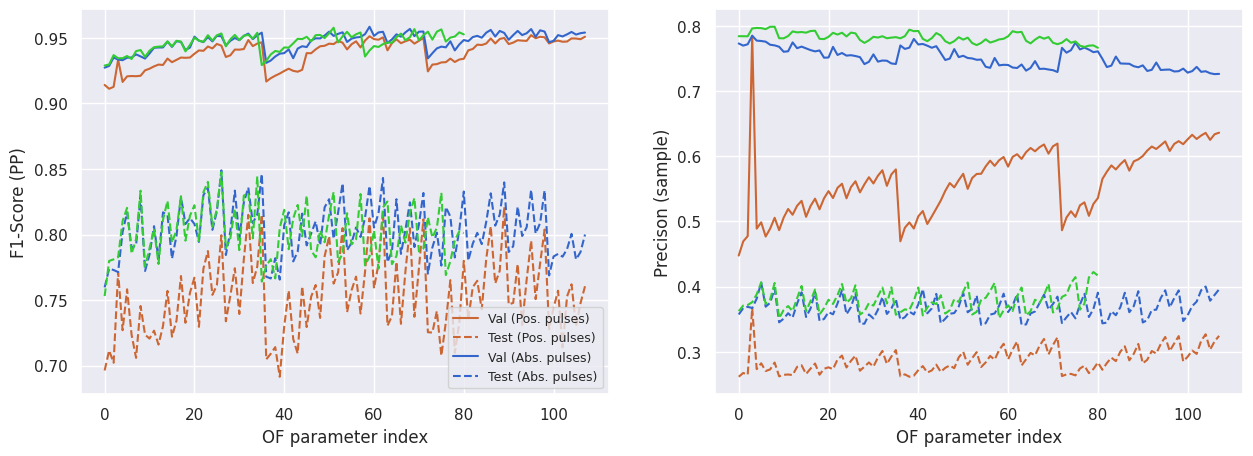

In [6]:

import matplotlib.pyplot as plt
import seaborn as sns
import  numpy as np
sns.set()

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(15, 5)

ax[0].plot(np.array(df[(df["dataset"]=="val") & (df["pulses"]==0)]["F1_pp"]), color=[0.8, 0.4, 0.2])
ax[0].plot(np.array(df[(df["dataset"]=="test") & (df["pulses"]==0)]["F1_pp"]), color=[0.8, 0.4, 0.2], linestyle="--")
ax[0].plot(np.array(df[(df["dataset"]=="val") & (df["pulses"]==1)]["F1_pp"]), color=[0.2, 0.4, 0.8])
ax[0].plot(np.array(df[(df["dataset"]=="test") & (df["pulses"]==1)]["F1_pp"]), color=[0.2, 0.4, 0.8], linestyle="--")
ax[0].plot(np.array(df[(df["dataset"]=="val") & (df["pulses"]==2)]["F1_pp"]), color=[0.2, 0.8, 0.2])
ax[0].plot(np.array(df[(df["dataset"]=="test") & (df["pulses"]==2)]["F1_pp"]), color=[0.2, 0.8, 0.2], linestyle="--")

ax[0].set_ylabel("F1-Score (PP)")

ax[1].plot(np.array(df[(df["dataset"]=="val") & (df["pulses"]==0)]["precision_sample"]), color=[0.8, 0.4, 0.2])
ax[1].plot(np.array(df[(df["dataset"]=="test") & (df["pulses"]==0)]["precision_sample"]), color=[0.8, 0.4, 0.2], linestyle="--")
ax[1].plot(np.array(df[(df["dataset"]=="val") & (df["pulses"]==1)]["precision_sample"]), color=[0.2, 0.4, 0.8])
ax[1].plot(np.array(df[(df["dataset"]=="test") & (df["pulses"]==1)]["precision_sample"]), color=[0.2, 0.4, 0.8], linestyle="--")
ax[1].plot(np.array(df[(df["dataset"]=="val") & (df["pulses"]==2)]["precision_sample"]), color=[0.2, 0.8, 0.2])
ax[1].plot(np.array(df[(df["dataset"]=="test") & (df["pulses"]==2)]["precision_sample"]), color=[0.2, 0.8, 0.2], linestyle="--")

ax[1].set_ylabel("Precison (sample)")
ax[0].set_xlabel("OF parameter index")
ax[1].set_xlabel("OF parameter index")

ax[0].legend(["Val (Pos. pulses)", "Test (Pos. pulses)", "Val (Abs. pulses)", "Test (Abs. pulses)"], prop={'size': 9})

**Evaluate computation time**

In [81]:
of_params_options

[OfParams(n_layers=3, layer_interval=1, average=False, img_shape=(64, 64), grid_size=4, step_size=7, window_size=7, stop_steps=3),
 OfParams(n_layers=3, layer_interval=1, average=False, img_shape=(64, 64), grid_size=4, step_size=7, window_size=11, stop_steps=3),
 OfParams(n_layers=3, layer_interval=1, average=False, img_shape=(64, 64), grid_size=4, step_size=7, window_size=15, stop_steps=3),
 OfParams(n_layers=3, layer_interval=1, average=False, img_shape=(64, 64), grid_size=7, step_size=7, window_size=7, stop_steps=3),
 OfParams(n_layers=3, layer_interval=1, average=False, img_shape=(64, 64), grid_size=7, step_size=7, window_size=11, stop_steps=3),
 OfParams(n_layers=3, layer_interval=1, average=False, img_shape=(64, 64), grid_size=7, step_size=7, window_size=15, stop_steps=3),
 OfParams(n_layers=3, layer_interval=1, average=False, img_shape=(64, 64), grid_size=10, step_size=7, window_size=7, stop_steps=3),
 OfParams(n_layers=3, layer_interval=1, average=False, img_shape=(64, 64), gri

In [36]:
from src.blink_detector import get_params
from training.dataset_splitter import load_dataset_splitter
from training.helper import get_of_params_options
import joblib
from pikit import Recording
from functions.video_loader import decode_frames
from src.blink_detector import rotate_images
import time
from event_array import BlinkEvent
from features_calculator import calculate_optical_flow, concatenate_features

recording_dir = "/home/tom/experiments/long_rec"
recording = Recording(recording_dir)

timestamps, eye_left_images, eye_right_images = decode_frames(recording)
eye_left_images, eye_right_images = rotate_images(eye_left_images, eye_right_images)

_, pp_params = get_params()
of_params_options = get_of_params_options()

elapsed_t = []

for of_params in of_params_options:
    print(of_params)

    clf_root_path = Path("/cluster/users/tom/git/blink_detection/export-XGBClassifier-3-250120231459")

    clf_dir = "n_layers%d-layer_interval%d-grid%d-win%d" % (of_params.n_layers, of_params.layer_interval, of_params.grid_size, of_params.window_size)

    clf = joblib.load(str(clf_root_path / clf_dir / "weights-0.sav"))

    t = time.time()
    feature_array = calculate_optical_flow(of_params, eye_left_images, eye_right_images)
    features = concatenate_features(feature_array, of_params)
    elapsed_t.append(time.time() - t)
    print(elapsed_t[-1])

#     proba = clf.predict_proba(features)
#     blink_events = post_process(timestamps, proba, pp_params)
#     return blink_events

deprecated pixel format used, make sure you did set range correctly
 (repeated 6689 more times)
deprecated pixel format used, make sure you did set range correctly


recording duration = 4 m 53 s; num valid frames = 58403
decode_frames took 46.5 s
options 108
OfParams(n_layers=3, layer_interval=1, average=False, img_shape=(64, 64), grid_size=4, step_size=7, window_size=7, stop_steps=3)
31.921300411224365
OfParams(n_layers=3, layer_interval=1, average=False, img_shape=(64, 64), grid_size=4, step_size=7, window_size=11, stop_steps=3)
32.90569496154785
OfParams(n_layers=3, layer_interval=1, average=False, img_shape=(64, 64), grid_size=4, step_size=7, window_size=15, stop_steps=3)
35.46438646316528
OfParams(n_layers=3, layer_interval=1, average=False, img_shape=(64, 64), grid_size=7, step_size=7, window_size=7, stop_steps=3)
34.53385353088379
OfParams(n_layers=3, layer_interval=1, average=False, img_shape=(64, 64), grid_size=7, step_size=7, window_size=11, stop_steps=3)
36.03308725357056
OfParams(n_layers=3, layer_interval=1, average=False, img_shape=(64, 64), grid_size=7, step_size=7, window_size=15, stop_steps=3)
41.97055625915527
OfParams(n_layers=3

array([31.92130041, 32.90569496, 35.46438646, 34.53385353, 36.03308725,
       41.97055626, 38.61907673, 40.09001827, 50.83928204, 31.32129788,
       32.67318177, 35.48201203, 34.60349441, 36.26139522, 42.14539957,
       38.75294352, 40.4846065 , 51.01575994, 31.67824626, 32.8691783 ,
       35.43242407, 34.65561318, 36.04422736, 41.96890116, 39.09980893,
       40.39396071, 51.36717677, 32.0809679 , 35.22472572, 38.81651831,
       34.53205347, 35.98382473, 42.41641521, 38.61542273, 40.34897542,
       51.11591053, 31.63642573, 33.16525364, 36.0021565 , 34.66977072,
       36.107656  , 42.16547656, 38.85077977, 40.34874034, 51.14968276,
       31.68216801, 32.71419406, 35.66611147, 34.38301992, 35.73324108,
       42.09691429, 38.81475925, 40.59588075, 51.27325964, 31.62594318,
       32.85052633, 35.45560455, 34.8383882 , 36.14969802, 42.29247499,
       38.74572062, 40.32297707, 51.19145703, 31.6704154 , 32.71553588,
       35.58257961, 34.53291202, 36.11569929, 42.28682017, 38.97

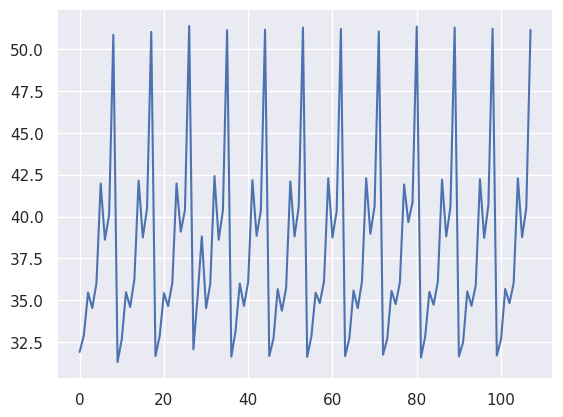

In [64]:
# x = [of_params_options[n].grid_size for n in range(0, len(of_params_options))]
plt.plot(elapsed_t)
# plt.xlabel()
elapsed_t



In [63]:
import numpy as np
# grid_size = [of_params_options[x].grid_size for x in range(0, len(of_params_options))]
grid_idx4 = np.where(np.array(grid_size) == 4)
grid_idx7 = np.where(np.array(grid_size) == 7)
grid_idx10 = np.where(np.array(grid_size) == 10)

# elapsed_t = np.array(elapsed_t)



(array([  6,   7,   8,  15,  16,  17,  24,  25,  26,  33,  34,  35,  42,
         43,  44,  51,  52,  53,  60,  61,  62,  69,  70,  71,  78,  79,
         80,  87,  88,  89,  96,  97,  98, 105, 106, 107]),)

In [66]:
elapsed_t[0:20]

array([31.92130041, 32.90569496, 35.46438646, 34.53385353, 36.03308725,
       41.97055626, 38.61907673, 40.09001827, 50.83928204, 31.32129788,
       32.67318177, 35.48201203, 34.60349441, 36.26139522, 42.14539957,
       38.75294352, 40.4846065 , 51.01575994, 31.67824626, 32.8691783 ])

In [67]:
grid_size[0:20]

[4, 4, 4, 7, 7, 7, 10, 10, 10, 4, 4, 4, 7, 7, 7, 10, 10, 10, 4, 4]

In [7]:
with pd.option_context('display.max_rows', 1000, 'display.max_columns', None):  # more options can be specified also
    display(df)

,n_layers,layer_interval,grid_size,window_size,dataset,F1_pp,F1_sample,F1_ml,precision_pp,precision_sample,precision_ml,recall_pp,recall_sample,recall_ml,pulses
0,3,1,4,7,train,0.930368,0.729441,0.541524,0.891897,0.634533,0.392724,0.972693,0.902439,0.965117,0
1,3,1,4,7,train,0.931474,0.813623,0.694652,0.918028,0.806906,0.542764,0.945339,0.820505,0.964908,1
2,3,1,4,7,val,0.914038,0.595840,0.401838,0.864834,0.447684,0.253716,0.969871,0.894223,0.969052,0
3,3,1,4,7,val,0.927181,0.789745,0.669154,0.914225,0.773100,0.512822,0.941437,0.808906,0.966610,1
4,3,1,4,7,test,0.696378,0.408652,0.244712,0.568499,0.261692,0.140563,0.899449,0.932486,0.944904,0
5,3,1,4,7,test,0.759704,0.511662,0.305394,0.674013,0.357204,0.182260,0.870523,0.902197,0.942149,1
6,3,1,4,11,train,0.931710,0.745257,0.561871,0.891121,0.650812,0.413980,0.976579,0.911573,0.959672,0
7,3,1,4,11,train,0.935678,0.819590,0.707778,0.915725,0.804079,0.558497,0.956535,0.835813,0.966509,1
8,3,1,4,11,val,0.911104,0.616783,0.422762,0.858246,0.469398,0.271107,0.971736,0.902422,0.964457,0
9,3,1,4,11,val,0.928541,0.795288,0.679599,0.906824,0.769873,0.524650,0.952036,0.823944,0.967942,1


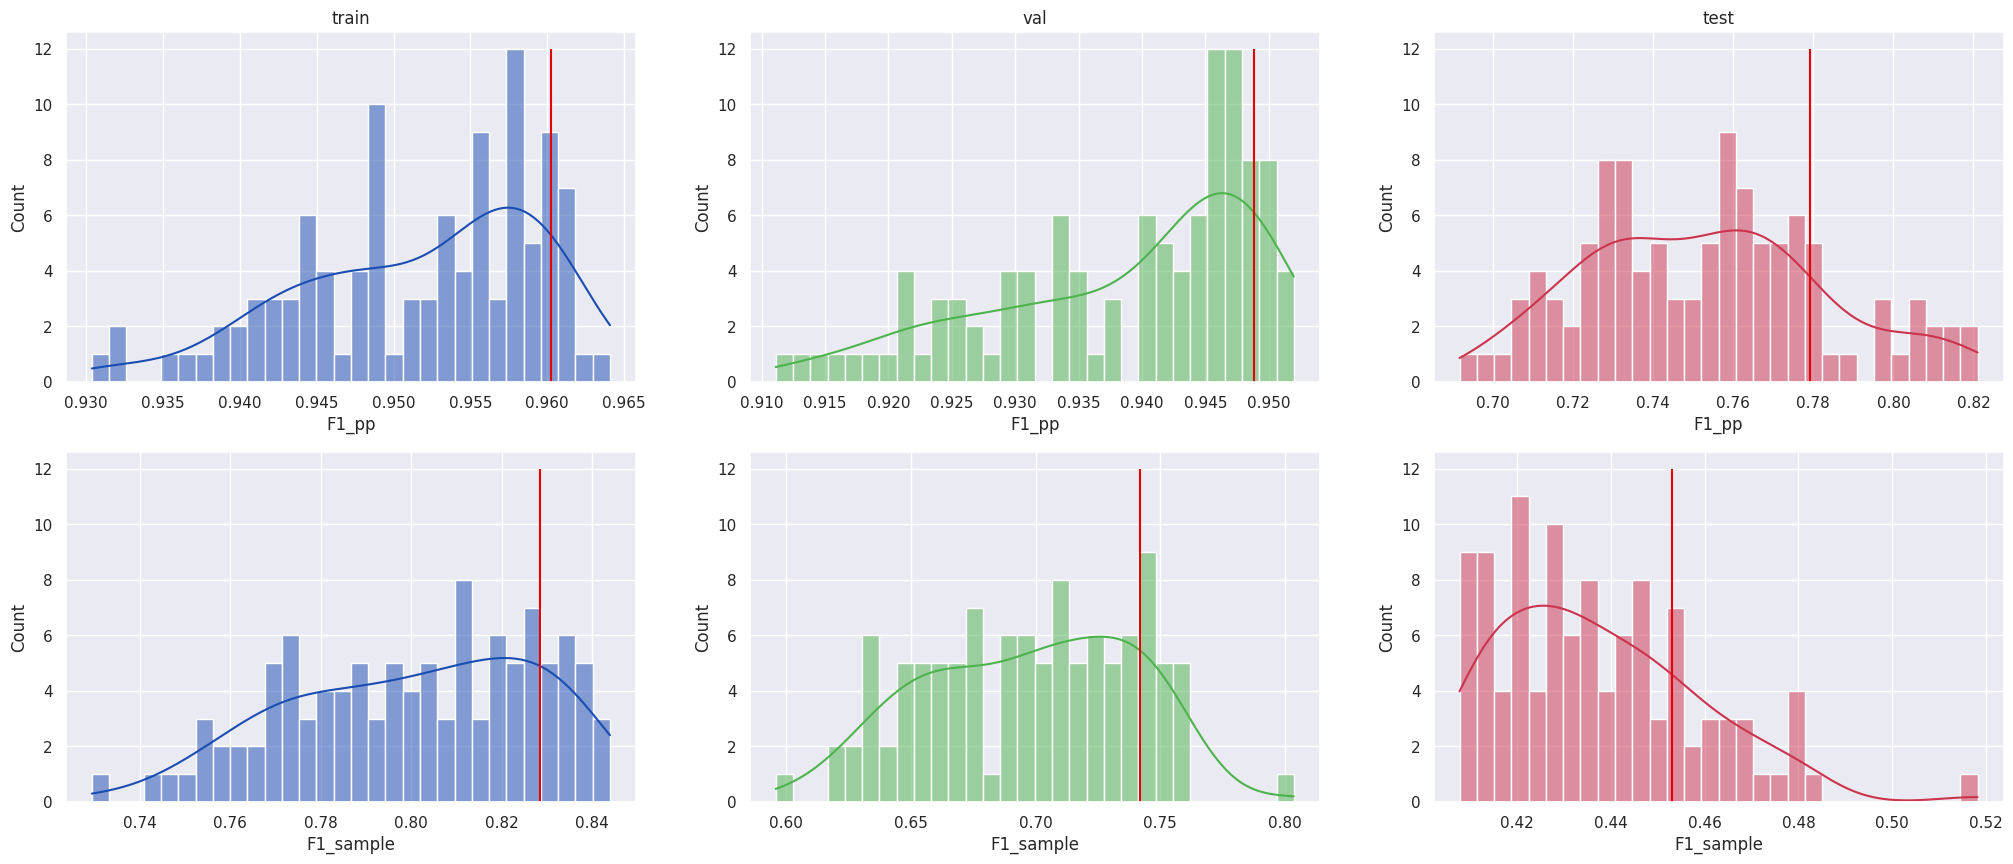

In [298]:
from src.helper import OfParams, PPParams

of_params = OfParams(5, 7, False, (64, 64), 4, 7, 15, 3)

fig, ax = plt.subplots(2, 3)
fig.set_size_inches(25, 10)
colors = [[0.1, 0.3, 0.7], [0.3, 0.7, 0.3], [0.8, 0.2, 0.3]]
nbins = 30

for counter, dataset in enumerate(["train", "val", "test"]):

    F1_pp_best = df[(df["n_layers"]==of_params.n_layers) & (df["layer_interval"]==of_params.layer_interval) & (df["grid_size"]==of_params.grid_size) & (df["window_size"]==of_params.window_size) & (df["dataset"]==dataset)]["F1_pp"]

    y = df[df["dataset"]==dataset]["F1_pp"]
    sns.histplot(y, kde=True, bins=nbins, ax=ax[0, counter], color=colors[counter])
    ax[0, counter].vlines(F1_pp_best, 0, 12, color=[0.9, 0, 0], linestyle="-")
    ax[0, counter].set_title(dataset)

    F1_sample_best = df[(df["n_layers"]==of_params.n_layers) & (df["layer_interval"]==of_params.layer_interval) & (df["grid_size"]==of_params.grid_size) & (df["window_size"]==of_params.window_size) & (df["dataset"]==dataset)]["F1_sample"]

    y = df[df["dataset"]==dataset]["F1_sample"]
    sns.histplot(y, kde=True, bins=nbins, ax=ax[1, counter], color=colors[counter])
    ax[1, counter].vlines(F1_sample_best, 0, 12, color=[0.9, 0, 0], linestyle="-")



In [325]:
F1_pp_best = df[(df["n_layers"]==of_params.n_layers) & (df["layer_interval"]==of_params.layer_interval) & (df["grid_size"]==of_params.grid_size) & (df["window_size"]==of_params.window_size) & (df["dataset"]=="val")]["F1_pp"]


d = df[(df['F1_pp'] > np.array(F1_pp_best)[0])]



In [330]:
d[d["dataset"]=="val"].head(50)

,n_layers,layer_interval,grid_size,window_size,dataset,F1_pp,F1_sample,F1_ml,precision_pp,precision_sample,precision_ml,recall_pp,recall_sample,recall_ml
178,5,5,7,15,val,0.951128,0.730400,0.580187,0.927963,0.598925,0.421022,0.976241,0.938764,0.937686
181,5,5,10,7,val,0.948976,0.718021,0.558842,0.926042,0.584135,0.398648,0.974051,0.934413,0.937391
187,5,5,10,15,val,0.950283,0.733848,0.584437,0.927555,0.603200,0.425588,0.974982,0.939622,0.937981
214,5,7,10,15,val,0.949901,0.747298,0.637141,0.928425,0.619495,0.484387,0.973101,0.944304,0.934792
259,7,3,7,15,val,0.949463,0.726372,0.564369,0.926545,0.594182,0.404797,0.974266,0.937272,0.937161
265,7,3,10,11,val,0.949091,0.724363,0.563929,0.925839,0.592212,0.404517,0.974509,0.935961,0.936428
268,7,3,10,15,val,0.949838,0.727564,0.566434,0.927557,0.595304,0.407130,0.973785,0.938375,0.935134
286,7,5,7,15,val,0.951984,0.749843,0.644530,0.930610,0.622838,0.492556,0.975272,0.944652,0.936263
289,7,5,10,7,val,0.949640,0.737952,0.622055,0.927069,0.608168,0.466683,0.974466,0.941157,0.936613
292,7,5,10,11,val,0.950731,0.746866,0.638279,0.929709,0.618944,0.485228,0.973747,0.944654,0.936680


In [2]:
import pandas as pd
df = pd.read_csv("/home/tom/experiments/long_rec/export/blinks.csv")

In [3]:
df

,blink id,start timestamp [ns],end timestamp [ns],duration [ms]
0,1,1674666108712480413,1674666109204441413,491
1,2,1674666112184471413,1674666112580500413,396
2,3,1674666123096502413,1674666123548505413,452
3,4,1674666125028442413,1674666125500735413,472
4,5,1674666126092448413,1674666126476429413,383
...,...,...,...,...
75,76,1674666371416493413,1674666371832497413,416
76,77,1674666374096493413,1674666374512469413,415
77,78,1674666378888458413,1674666379277009413,388
78,79,1674666388440456413,1674666388820683413,380
